<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/9_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#Cargar archivo csv 
df=pd.read_csv('01_DiatomInventories_GTstudentproject_B 2.csv') 
df.head(50)

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000
5,Achnanthes affinis,Achaf01,S02096900_20080910,S02096900,2008-09-10,34,400,85.000000
6,Achnanthes affinis,Achaf01,S02096950_20070911,S02096950,2007-09-11,1,400,2.500000
7,Achnanthes affinis,Achaf01,S02107870_20080723,S02107870,2008-07-23,1,400,2.500000
8,Achnanthes affinis,Achaf01,S02110650_20080730,S02110650,2008-07-30,1,400,2.500000
9,Achnanthes affinis,Achaf01,S02115950_20070802,S02115950,2007-08-02,2,400,5.000000


In [3]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B 2.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

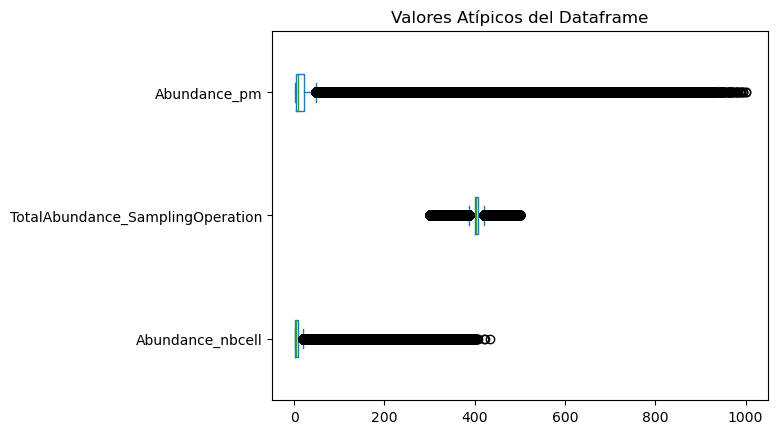

In [4]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [5]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [6]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [7]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [8]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [9]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [10]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


In [11]:
# Exploremos la estructura del DataFrame sin valores nulos
print("Forma del DataFrame:", Datos_limpios.shape)
print("\nColumnas del DataFrame:")
print(Datos_limpios.columns.tolist())
print("\nTipos de datos:")
print(Datos_limpios.dtypes)
print("\nInformación básica:")
Datos_limpios.info()

Forma del DataFrame: (1643872, 8)

Columnas del DataFrame:
['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation', 'Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']

Tipos de datos:
TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                    float64
TotalAbundance_SamplingOperation    float64
Abundance_pm                        float64
dtype: object

Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 

In [12]:
# Estadísticas descriptivas consolidadas en una sola tabla
print("ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS\n")

# Estadísticas con describe()
variables_numericas = ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
estadisticas = Datos_limpios[variables_numericas].describe()
percentiles_extra = Datos_limpios[variables_numericas].quantile([0.90, 0.95])
estadisticas_completas = pd.concat([estadisticas, percentiles_extra])

# Mostrar una sola tabla consolidada con todas las estadísticas
print("Estadísticas descriptivas:")
print(estadisticas_completas.round(2).to_string())

ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS

Estadísticas descriptivas:
       Abundance_nbcell  TotalAbundance_SamplingOperation  Abundance_pm
count        1643872.00                        1643872.00    1643872.00
mean               8.38                            405.18         20.68
std               13.87                              6.77         34.29
min                1.00                            375.00          2.00
25%                2.00                            400.00          4.68
50%                3.00                            403.00          7.40
75%                8.00                            408.00         19.90
max               94.00                            437.00        233.85
0.9               22.00                            415.00         54.73
0.95              38.00                            419.00         93.83


In [13]:
# Análisis de las variables categóricas
print("RESUMEN DE VARIABLES CATEGÓRICAS\n")

categoricas = ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation']

# Crear tabla resumen 
for col in categoricas:
    print(f"{col}: {Datos_limpios[col].nunique():,} valores únicos")

print(f"TaxonName: Especies (para especies dominantes)")
print(f"Date_SamplingOperation: Fechas (para períodos recientes)")

RESUMEN DE VARIABLES CATEGÓRICAS

TaxonName: 2,292 valores únicos
TaxonCode: 2,292 valores únicos
SamplingOperations_code: 49,231 valores únicos
CodeSite_SamplingOperations: 8,404 valores únicos
Date_SamplingOperation: 2,237 valores únicos
TaxonName: Especies (para especies dominantes)
Date_SamplingOperation: Fechas (para períodos recientes)


In [14]:
# Análisis de las variables fechas
Datos_limpios['Date_SamplingOperation'] = pd.to_datetime(Datos_limpios['Date_SamplingOperation'])
Datos_limpios['Año'] = Datos_limpios['Date_SamplingOperation'].dt.year

# Análisis temporal 
print(f"FECHAS: Rango {Datos_limpios['Año'].min()} - {Datos_limpios['Año'].max()}")
print(f"Últimos 5 años (2019+): {(Datos_limpios['Año'] >= 2019).sum():,} registros ({(Datos_limpios['Año'] >= 2019).mean()*100:.1f}%)")

# Análisis de especies de la BD
especies_freq = Datos_limpios['TaxonName'].value_counts()
print(f"\n ESPECIES: {len(especies_freq):,} especies únicas")
print(f"Top 10 especies: {especies_freq.head(10).sum():,} registros ({especies_freq.head(10).sum()/len(Datos_limpios)*100:.1f}%)")

# Nuestras primeras variables a utilizar
print(f"Date_SamplingOperation → Periodo_Reciente (≥2019)")
print(f"TaxonName → Especie_Dominante (Top 10)")

FECHAS: Rango 2007 - 2023
Últimos 5 años (2019+): 533,097 registros (32.4%)

 ESPECIES: 2,292 especies únicas
Top 10 especies: 350,180 registros (21.3%)
Date_SamplingOperation → Periodo_Reciente (≥2019)
TaxonName → Especie_Dominante (Top 10)


In [15]:
# Explorar la variable Abundance_pm para crear una nueva dicotómica
print("\nAnálisis de Abundance_pm para nueva variable:")

# Estadísticas de Abundance_pm
print(f"Abundance_pm - Estadísticas:")
print(f"- Min: {Datos_limpios['Abundance_pm'].min():.2f}")
print(f"- Max: {Datos_limpios['Abundance_pm'].max():.2f}")
print(f"- Media: {Datos_limpios['Abundance_pm'].mean():.2f}")
print(f"- Mediana: {Datos_limpios['Abundance_pm'].median():.2f}")
print(f"- Percentil 75: {Datos_limpios['Abundance_pm'].quantile(0.75):.2f}")
print(f"- Percentil 90: {Datos_limpios['Abundance_pm'].quantile(0.90):.2f}")

# Análisis de CodeSite_SamplingOperations para variable geográfica
print(f"\nAnálisis de CodeSite_SamplingOperations para variable geográfica:")

# Verificar si la columna existe antes de usarla
if 'NumeroSitio' in Datos_limpios.columns:
    print("Distribución de números de sitio:")
    primeros_digitos = Datos_limpios['NumeroSitio'].astype(str).str[0]
    print(primeros_digitos.value_counts().sort_index())
else:
    print("⚠️ Columna 'NumeroSitio' no encontrada")
    print("Columnas disponibles relacionadas con sitios:")
    columnas_sitio = [col for col in Datos_limpios.columns if 'Site' in col or 'site' in col]
    print(columnas_sitio)

# Analizar los códigos de operación de muestreo
print(f"\nAnálisis de SamplingOperations_code:")
print(f"Valores únicos: {Datos_limpios['SamplingOperations_code'].nunique():,}")

# Analizar patrones en los códigos de operación
codigo_sample = Datos_limpios['SamplingOperations_code'].head(10).tolist()
print(f"Muestra de códigos: {codigo_sample}")


Análisis de Abundance_pm para nueva variable:
Abundance_pm - Estadísticas:
- Min: 2.00
- Max: 233.85
- Media: 20.68
- Mediana: 7.40
- Percentil 75: 19.90
- Percentil 90: 54.73

Análisis de CodeSite_SamplingOperations para variable geográfica:
⚠️ Columna 'NumeroSitio' no encontrada
Columnas disponibles relacionadas con sitios:
['CodeSite_SamplingOperations']

Análisis de SamplingOperations_code:
Valores únicos: 49,231
Muestra de códigos: ['S04094200_20120910', 'S05155300_20100728', 'S02018780_20070808', 'S02022675_20090803', 'S02094920_20120726', 'S02096900_20080910', 'S02096950_20070911', 'S02107870_20080723', 'S02110650_20080730', 'S02115950_20070802']


# Selección y creación de 5 variables DICOTÓMICAS

In [16]:
# VARIABLE 1: Alta abundancia de células (Abundance_nbcell):
umbral_abundancia = Datos_limpios['Abundance_nbcell'].quantile(0.75) # Umbral seleccionado en percentil 75
Datos_limpios['Alta_Abundancia_Celular'] = (Datos_limpios['Abundance_nbcell'] >= umbral_abundancia).astype(int)

print(f"1. ALTA ABUNDANCIA CELULAR (Abundance_nbcell >= {umbral_abundancia:.0f}):")
print(f"Justificación: Percentil 75 para distinguir comunidades densas de diatomeas")
print(f"Umbral: {umbral_abundancia:.0f} células")

# Calcular conteos y porcentajes
conteos = Datos_limpios['Alta_Abundancia_Celular'].value_counts().to_dict()
porcentaje_positivo = (Datos_limpios['Alta_Abundancia_Celular'] == 1).mean() * 100
porcentaje_negativo = (Datos_limpios['Alta_Abundancia_Celular'] == 0).mean() * 100

print(f"Distribución: {conteos}")
print(f"Porcentajes: {porcentaje_negativo:.1f}% (0), {porcentaje_positivo:.1f}% (1)")

1. ALTA ABUNDANCIA CELULAR (Abundance_nbcell >= 8):
Justificación: Percentil 75 para distinguir comunidades densas de diatomeas
Umbral: 8 células
Distribución: {0: 1208374, 1: 435498}
Porcentajes: 73.5% (0), 26.5% (1)


In [17]:
# VARIABLE 2: Alta abundancia total de la operación de muestreo (TotalAbundance_SamplingOperation)
umbral_total = Datos_limpios['TotalAbundance_SamplingOperation'].quantile(0.75)
Datos_limpios['Alta_Abundancia_Total'] = (Datos_limpios['TotalAbundance_SamplingOperation'] >= umbral_total).astype(int)

print(f"\n2. ALTA ABUNDANCIA TOTAL DE MUESTREO (TotalAbundance_SamplingOperation >= {umbral_total:.0f}):")
print(f"Justificación: Percentil 75 para identificar operaciones de muestreo con alta diversidad")
print(f"Umbral: {umbral_total:.0f} unidades")

# Calcular conteos y porcentajes
conteos_total = Datos_limpios['Alta_Abundancia_Total'].value_counts().to_dict()
porcentaje_positivo_total = (Datos_limpios['Alta_Abundancia_Total'] == 1).mean() * 100
porcentaje_negativo_total = (Datos_limpios['Alta_Abundancia_Total'] == 0).mean() * 100

print(f"Distribución: {conteos_total}")
print(f"Porcentajes: {porcentaje_negativo_total:.1f}% (0), {porcentaje_positivo_total:.1f}% (1)")


2. ALTA ABUNDANCIA TOTAL DE MUESTREO (TotalAbundance_SamplingOperation >= 408):
Justificación: Percentil 75 para identificar operaciones de muestreo con alta diversidad
Umbral: 408 unidades
Distribución: {0: 1205639, 1: 438233}
Porcentajes: 73.3% (0), 26.7% (1)


In [18]:
# VARIABLE 3: Alta abundancia por metro (Abundance_pm)
umbral_abundance_pm = Datos_limpios['Abundance_pm'].quantile(0.75)
Datos_limpios['Alta_Abundance_PM'] = (Datos_limpios['Abundance_pm'] >= umbral_abundance_pm).astype(int)

print(f"\n3. ALTA ABUNDANCE POR METRO (Abundance_pm >= {umbral_abundance_pm:.2f}):")
print(f"Justificación: Percentil 75 para identificar muestras con alta densidad por metro")
print(f"Umbral: {umbral_abundance_pm:.2f} unidades por metro")

# Calcular conteos y porcentajes
conteos_pm = Datos_limpios['Alta_Abundance_PM'].value_counts().to_dict()
porcentaje_positivo_pm = (Datos_limpios['Alta_Abundance_PM'] == 1).mean() * 100
porcentaje_negativo_pm = (Datos_limpios['Alta_Abundance_PM'] == 0).mean() * 100

print(f"Distribución: {conteos_pm}")
print(f"Porcentajes: {porcentaje_negativo_pm:.1f}% (0), {porcentaje_positivo_pm:.1f}% (1)")


3. ALTA ABUNDANCE POR METRO (Abundance_pm >= 19.90):
Justificación: Percentil 75 para identificar muestras con alta densidad por metro
Umbral: 19.90 unidades por metro
Distribución: {0: 1232236, 1: 411636}
Porcentajes: 75.0% (0), 25.0% (1)


In [19]:
# VARIABLE 4: Período reciente de muestreo (últimos 5 años) (Date_SamplingOperation)
Datos_limpios['Periodo_Reciente'] = (Datos_limpios['Año'] >= 2019).astype(int)

print(f"\n4. PERÍODO RECIENTE DE MUESTREO (Año >= 2019):")
print(f"Justificación: Últimos 5 años representan condiciones ambientales actuales")
print(f"Umbral: Año 2019 en adelante")

# Calcular conteos y porcentajes
conteos_periodo = Datos_limpios['Periodo_Reciente'].value_counts().to_dict()
porcentaje_positivo_periodo = (Datos_limpios['Periodo_Reciente'] == 1).mean() * 100
porcentaje_negativo_periodo = (Datos_limpios['Periodo_Reciente'] == 0).mean() * 100

print(f"Distribución: {conteos_periodo}")
print(f"Porcentajes: {porcentaje_negativo_periodo:.1f}% (0), {porcentaje_positivo_periodo:.1f}% (1)")


4. PERÍODO RECIENTE DE MUESTREO (Año >= 2019):
Justificación: Últimos 5 años representan condiciones ambientales actuales
Umbral: Año 2019 en adelante
Distribución: {0: 1110775, 1: 533097}
Porcentajes: 67.6% (0), 32.4% (1)


In [20]:
# VARIABLE 5: Especie dominante (TaxonName)
especies_top = ['Achnanthes minutissima', 'Amphora pediculus', 'Cocconeis euglypta', 
                'Sellaphora nigri', 'Navicula cryptotenella', 'Nitzschia dissipata',
                'Vibrio tripunctatus', 'Rhoicosphenia abbreviata', 'Navicula permitis', 
                'Achnanthes lanceolata']
Datos_limpios['Especie_Dominante'] = Datos_limpios['TaxonName'].isin(especies_top).astype(int)

print(f"\n5. ESPECIE DOMINANTE (Top 10 especies más frecuentes):")
print(f"Justificación: Top 10 especies representan ~20% de todos los registros")
print(f"Umbral: Pertenecer a las 10 especies más frecuentes del dataset")

# Calcular conteos y porcentajes
conteos_especie = Datos_limpios['Especie_Dominante'].value_counts().to_dict()
porcentaje_positivo_especie = (Datos_limpios['Especie_Dominante'] == 1).mean() * 100
porcentaje_negativo_especie = (Datos_limpios['Especie_Dominante'] == 0).mean() * 100

print(f"Distribución: {conteos_especie}")
print(f"Porcentajes: {porcentaje_negativo_especie:.1f}% (0), {porcentaje_positivo_especie:.1f}% (1)")


5. ESPECIE DOMINANTE (Top 10 especies más frecuentes):
Justificación: Top 10 especies representan ~20% de todos los registros
Umbral: Pertenecer a las 10 especies más frecuentes del dataset
Distribución: {0: 1293692, 1: 350180}
Porcentajes: 78.7% (0), 21.3% (1)


In [21]:
# Unir todo en un DataFrame final
DF_Final_Corregido = Datos_limpios.copy()
print(f"Dimensiones: {DF_Final_Corregido.shape}")
print(f"Columnas: {len(DF_Final_Corregido.columns)}")
print(f"Valores nulos: {DF_Final_Corregido.isnull().sum().sum()}")

# Variables dicotómicas creadas
variables_dicotomicas = ['Alta_Abundancia_Celular', 'Alta_Abundancia_Total', 
                        'Alta_Abundance_PM', 'Periodo_Reciente', 'Especie_Dominante']

print(f"\nVariables dicotómicas disponibles: {len(variables_dicotomicas)}")
print(variables_dicotomicas)

Dimensiones: (1643872, 14)
Columnas: 14
Valores nulos: 0

Variables dicotómicas disponibles: 5
['Alta_Abundancia_Celular', 'Alta_Abundancia_Total', 'Alta_Abundance_PM', 'Periodo_Reciente', 'Especie_Dominante']


In [22]:
# Todas las columnas del DataFrame final
print(f"\nTodas las columnas en DF_Final_Corregido({len(DF_Final_Corregido.columns)}):")
print(DF_Final_Corregido.columns.tolist())


Todas las columnas en DF_Final_Corregido(14):
['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation', 'Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm', 'Año', 'Alta_Abundancia_Celular', 'Alta_Abundancia_Total', 'Alta_Abundance_PM', 'Periodo_Reciente', 'Especie_Dominante']


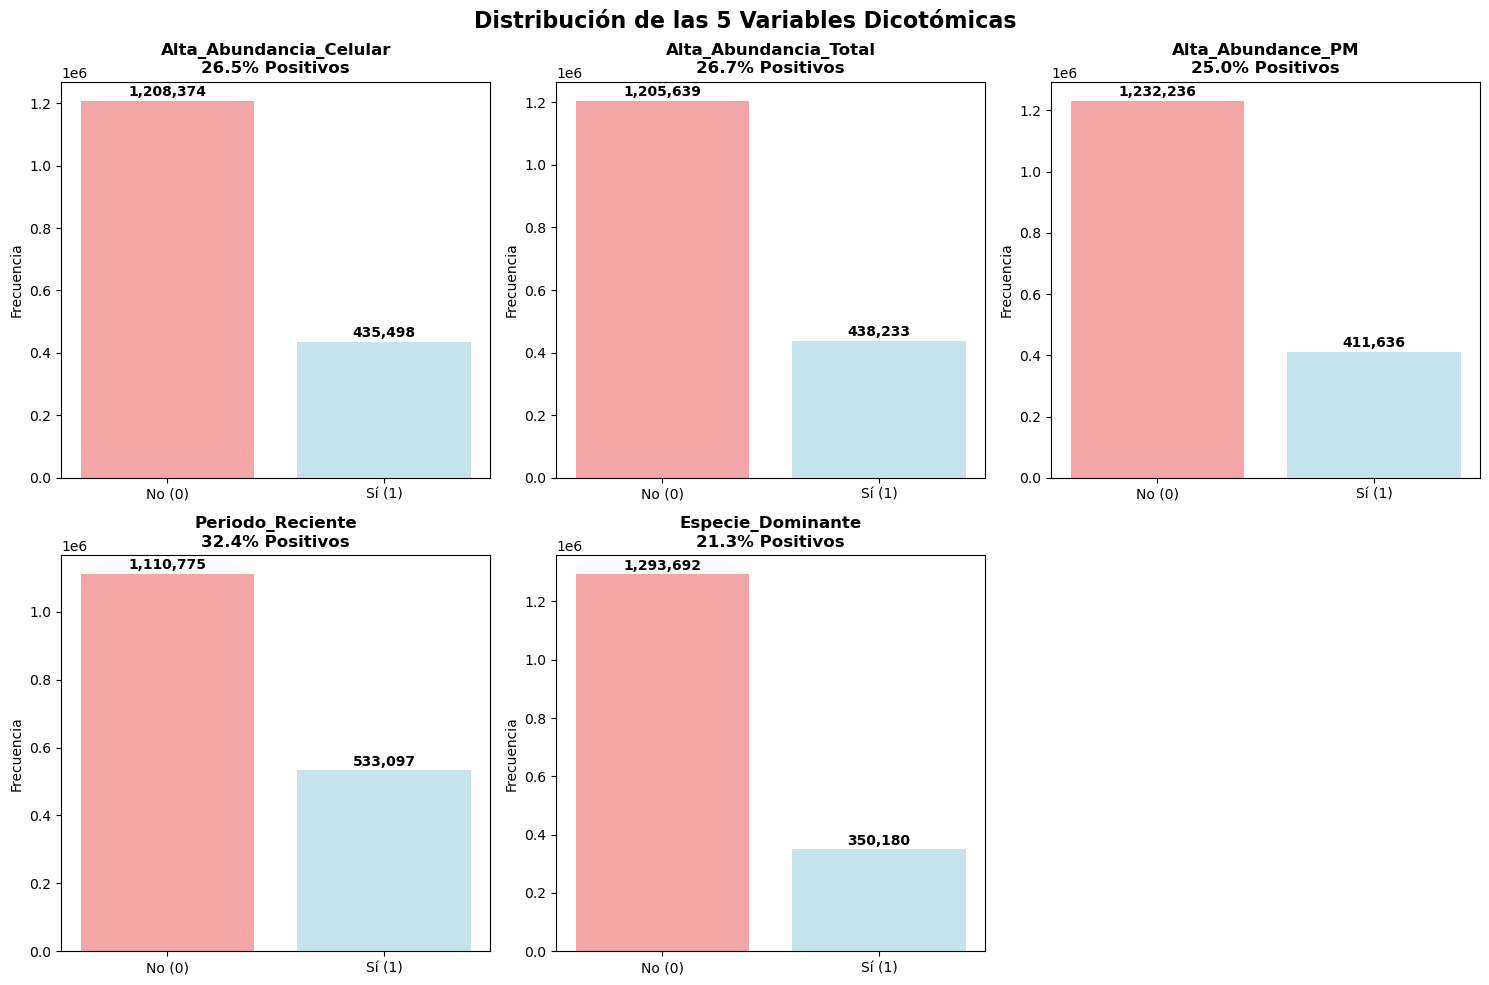

In [23]:
variables_dicotomicas = ['Alta_Abundancia_Celular', 'Alta_Abundancia_Total', 
                        'Alta_Abundance_PM', 'Periodo_Reciente', 'Especie_Dominante']

# Crear gráficos de distribución
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de las 5 Variables Dicotómicas', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_dicotomicas):
    row = i // 3
    col = i % 3
    
    counts = DF_Final_Corregido[var].value_counts()
    percentages = DF_Final_Corregido[var].value_counts(normalize=True) * 100
    
    # Crear gráfico de barras
    axes[row, col].bar(['No (0)', 'Sí (1)'], counts.values, 
                       color=['lightcoral', 'lightblue'], alpha=0.7)
    axes[row, col].set_title(f'{var}\n{percentages[1]:.1f}% Positivos', fontweight='bold')
    axes[row, col].set_ylabel('Frecuencia')
    
    # Agregar valores en las barras
    for j, v in enumerate(counts.values):
        axes[row, col].text(j, v + 5000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Eliminar el subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [24]:
# IMPORTAR LIBRERÍAS ADICIONALES PARA REGRESIÓN LOGÍSTICA
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [25]:
# REGRESIÓN LOGÍSTICA 1: PREDECIR ALTA_ABUNDANCIA_CELULAR
print("REGRESIÓN LOGÍSTICA 1: PREDECIR ALTA_ABUNDANCIA_CELULAR")

# Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = DF_Final_Corregido[['TotalAbundance_SamplingOperation', 'Abundance_pm']]
Var_Dep = DF_Final_Corregido['Alta_Abundancia_Celular']

# Redefinimos las variables 
X = Vars_Indep
y = Var_Dep

print(f"Variables independientes: {list(X.columns)}")
print(f"Variable dependiente: Alta_Abundancia_Celular")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(f"Predicciones realizadas: {len(y_pred)}")

REGRESIÓN LOGÍSTICA 1: PREDECIR ALTA_ABUNDANCIA_CELULAR
Variables independientes: ['TotalAbundance_SamplingOperation', 'Abundance_pm']
Variable dependiente: Alta_Abundancia_Celular
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162
Predicciones realizadas: 493162


In [26]:
# Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

# Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

# Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Matriz de Confusión:
[[362091    201]
 [   338 130532]]
Precisión del modelo:
0.9984625152027414
Exactitud del modelo:
0.9989070528548428
Sensibilidad del modelo:
0.9974172843279591
Puntaje F1 del modelo:
0.9979396260746245


In [27]:
# REGRESIÓN LOGÍSTICA 2: PREDECIR ALTA_ABUNDANCIA_TOTAL

print("REGRESIÓN LOGÍSTICA 2: PREDECIR ALTA_ABUNDANCIA_TOTAL")

# Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = DF_Final_Corregido[['Abundance_nbcell', 'Abundance_pm']]
Var_Dep = DF_Final_Corregido['Alta_Abundancia_Total']

# Redefinimos las variables 
X = Vars_Indep
y = Var_Dep

print(f"Variables independientes: {list(X.columns)}")
print(f"Variable dependiente: Alta_Abundancia_Total")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(f"Predicciones realizadas: {len(y_pred)}")

REGRESIÓN LOGÍSTICA 2: PREDECIR ALTA_ABUNDANCIA_TOTAL
Variables independientes: ['Abundance_nbcell', 'Abundance_pm']
Variable dependiente: Alta_Abundancia_Total
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162
Predicciones realizadas: 493162


In [28]:
# Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label=0) # 
print('Precisión del modelo:')
print(precision)

# Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print('Sensibilidad del modelo:')
print(sensibilidad)

# Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Matriz de Confusión:
[[362411    382]
 [130351     18]]
Precisión del modelo:
0.735468644091874
Exactitud del modelo:
0.7349086101524448
Sensibilidad del modelo:
0.9989470579641835
Puntaje F1 del modelo:
0.00027529460346106496


In [29]:
# REGRESIÓN LOGÍSTICA 3: PREDECIR ALTA_ABUNDANCE_PM

print("REGRESIÓN LOGÍSTICA 3: PREDECIR ALTA_ABUNDANCE_PM")

# Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation']]
Var_Dep = DF_Final_Corregido['Alta_Abundance_PM']

# Redefinimos las variables 
X = Vars_Indep
y = Var_Dep

print(f"Variables independientes: {list(X.columns)}")
print(f"Variable dependiente: Alta_Abundance_PM")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(f"Predicciones realizadas: {len(y_pred)}")

REGRESIÓN LOGÍSTICA 3: PREDECIR ALTA_ABUNDANCE_PM
Variables independientes: ['Abundance_nbcell', 'TotalAbundance_SamplingOperation']
Variable dependiente: Alta_Abundance_PM
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162
Predicciones realizadas: 493162


In [30]:
# Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

# Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

# Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Matriz de Confusión:
[[369886    167]
 [  1516 121593]]
Precisión del modelo:
0.9986284494086728
Exactitud del modelo:
0.9965873283018561
Sensibilidad del modelo:
0.9876857094119845
Puntaje F1 del modelo:
0.9931269372603311


In [31]:
# REGRESIÓN LOGÍSTICA 4: PREDECIR PERIODO_RECIENTE

print("REGRESIÓN LOGÍSTICA 4: PREDECIR PERIODO_RECIENTE")

# Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']]
Var_Dep = DF_Final_Corregido['Periodo_Reciente']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

print(f"Variables independientes: {list(X.columns)}")
print(f"Variable dependiente: Periodo_Reciente")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(f"Predicciones realizadas: {len(y_pred)}")

REGRESIÓN LOGÍSTICA 4: PREDECIR PERIODO_RECIENTE
Variables independientes: ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
Variable dependiente: Periodo_Reciente
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162
Predicciones realizadas: 493162


In [32]:
# Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

# Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

# Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Matriz de Confusión:
[[333362      0]
 [159800      0]]
Precisión del modelo:
0.0
Exactitud del modelo:
0.6759685458328095
Sensibilidad del modelo:
0.0
Puntaje F1 del modelo:
0.0


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# REGRESIÓN LOGÍSTICA 5: PREDECIR ESPECIE_DOMINANTE

print("📊 REGRESIÓN LOGÍSTICA 5: PREDECIR ESPECIE_DOMINANTE")

# Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']]
Var_Dep = DF_Final_Corregido['Especie_Dominante']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

print(f"Variables independientes: {list(X.columns)}")
print(f"Variable dependiente: Especie_Dominante")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print(f"Datos de entrenamiento: {X_train.shape[0]:,}")
print(f"Datos de prueba: {X_test.shape[0]:,}")

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
print(f"Predicciones realizadas: {len(y_pred)}")

📊 REGRESIÓN LOGÍSTICA 5: PREDECIR ESPECIE_DOMINANTE
Variables independientes: ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
Variable dependiente: Especie_Dominante
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162
Predicciones realizadas: 493162


In [34]:
# Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo:')
print(precision)

# Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo:')
print(sensibilidad)

# Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Matriz de Confusión:
[[378252   9802]
 [ 91164  13944]]
Precisión del modelo:
0.5872146887896909
Exactitud del modelo:
0.7952680863489077
Sensibilidad del modelo:
0.13266354606690262
Puntaje F1 del modelo:
0.21643099942570662


Aplicar el ajuste de correlación logística que existe entre las variables dicotómicas de nuestra base de datos (En caso de ser necesario), aplicando las herramientas de “Reponderación de clases” u “Oversampling”


In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# APLICANDO TÉCNICA DE SOBREMUESTREO PARA REGRESIÓN LOGÍSTICA 4: PERIODO_RECIENTE
Se aplicará la técnica de oversampling con SMOTE para balancear las clases del modelo que predice `Periodo_Reciente`.

In [36]:
# REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING: PREDECIR PERIODO_RECIENTE

print("REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING: PREDECIR PERIODO_RECIENTE")

# Declaramos las variables dependientes e independientes para la regresión Logística 4
Vars_Indep_RL4 = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']]
Var_Dep_RL4 = DF_Final_Corregido['Periodo_Reciente']

# Redefinimos las variables
X_RL4 = Vars_Indep_RL4
y_RL4 = Var_Dep_RL4

print(f"Variables independientes: {list(X_RL4.columns)}")
print(f"Variable dependiente: Periodo_Reciente")

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train_RL4, X_test_RL4, y_train_RL4, y_test_RL4 = train_test_split(X_RL4, y_RL4, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train_RL4.shape[0]:,}")
print(f"Datos de prueba: {X_test_RL4.shape[0]:,}")

# Verificar la distribución antes del balanceo
print(f"\nDistribución original en entrenamiento:")
print(f"Clase 0 (Período anterior): {(y_train_RL4 == 0).sum():,} ({(y_train_RL4 == 0).mean()*100:.1f}%)")
print(f"Clase 1 (Período reciente): {(y_train_RL4 == 1).sum():,} ({(y_train_RL4 == 1).mean()*100:.1f}%)")

# Se escalan todos los datos
escalar_RL4 = StandardScaler()

# Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba
X_train_RL4_scaled = escalar_RL4.fit_transform(X_train_RL4)
X_test_RL4_scaled = escalar_RL4.transform(X_test_RL4)

REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING: PREDECIR PERIODO_RECIENTE
Variables independientes: ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
Variable dependiente: Periodo_Reciente
Datos de entrenamiento: 1,150,710
Datos de prueba: 493,162

Distribución original en entrenamiento:
Clase 0 (Período anterior): 777,613 (67.6%)
Clase 1 (Período reciente): 373,097 (32.4%)


In [37]:
# Aplicamos la técnica de sobremuestreo (oversampling) con SMOTE para RL4
from imblearn.over_sampling import SMOTE

smote_RL4 = SMOTE(random_state=42)
X_resampled_RL4, y_resampled_RL4 = smote_RL4.fit_resample(X_train_RL4_scaled, y_train_RL4)

print("OVERSAMPLING APLICADO CON ÉXITO")
print(f"\nDistribución después del balanceo:")
print(f"Clase 0 (Período anterior): {(y_resampled_RL4 == 0).sum():,} ({(y_resampled_RL4 == 0).mean()*100:.1f}%)")
print(f"Clase 1 (Período reciente): {(y_resampled_RL4 == 1).sum():,} ({(y_resampled_RL4 == 1).mean()*100:.1f}%)")
print(f"\nTamaño del conjunto de entrenamiento:")
print(f"Original: {X_train_RL4_scaled.shape[0]:,} muestras")
print(f"Balanceado: {X_resampled_RL4.shape[0]:,} muestras")

OVERSAMPLING APLICADO CON ÉXITO

Distribución después del balanceo:
Clase 0 (Período anterior): 777,613 (50.0%)
Clase 1 (Período reciente): 777,613 (50.0%)

Tamaño del conjunto de entrenamiento:
Original: 1,150,710 muestras
Balanceado: 1,555,226 muestras


In [38]:
# Entrenamos el modelo sobremuestreado para RL4
algoritmo_Over_sampling_RL4 = LogisticRegression(random_state=42)
algoritmo_Over_sampling_RL4.fit(X_resampled_RL4, y_resampled_RL4)

print("MODELO ENTRENADO CON DATOS BALANCEADOS")
print("Modelo: Regresión Logística con Oversampling (SMOTE)")
print("Variable objetivo: Periodo_Reciente")

MODELO ENTRENADO CON DATOS BALANCEADOS
Modelo: Regresión Logística con Oversampling (SMOTE)
Variable objetivo: Periodo_Reciente


In [39]:
# Realizamos predicciones con el modelo balanceado RL4
y_pred_over_sampling_RL4 = algoritmo_Over_sampling_RL4.predict(X_test_RL4_scaled)

print("PREDICCIONES REALIZADAS")
print(f"Total de predicciones: {len(y_pred_over_sampling_RL4):,}")
print(f"Predicciones clase 0: {(y_pred_over_sampling_RL4 == 0).sum():,}")
print(f"Predicciones clase 1: {(y_pred_over_sampling_RL4 == 1).sum():,}")

# Mostrar algunas predicciones
print(f"\nPrimeras 10 predicciones: {y_pred_over_sampling_RL4[:10]}")
print(f"Valores reales (primeros 10): {y_test_RL4.values[:10]}")

PREDICCIONES REALIZADAS
Total de predicciones: 493,162
Predicciones clase 0: 304,436
Predicciones clase 1: 188,726

Primeras 10 predicciones: [0 0 0 0 0 0 1 1 0 1]
Valores reales (primeros 10): [0 0 0 0 0 1 0 0 0 0]


In [40]:
# Verificamos la matriz de Confusión para RL4 con oversampling
from sklearn.metrics import confusion_matrix

matriz_RL4 = confusion_matrix(y_test_RL4, y_pred_over_sampling_RL4)
print("MATRIZ DE CONFUSIÓN - REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING")
print(matriz_RL4)

# Interpretación de la matriz
tn, fp, fn, tp = matriz_RL4.ravel()
print(f"\n📊 Interpretación de la matriz:")
print(f"Verdaderos Negativos (TN): {tn:,} - Correctamente predijo período anterior") 
print(f"Falsos Positivos (FP): {fp:,} - Incorrectamente predijo período reciente")
print(f"Falsos Negativos (FN): {fn:,} - Incorrectamente predijo período anterior") 
print(f"Verdaderos Positivos (TP): {tp:,} - Correctamente predijo período reciente")

MATRIZ DE CONFUSIÓN - REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING
[[210572 122590]
 [ 93864  66136]]

📊 Interpretación de la matriz:
Verdaderos Negativos (TN): 210,572 - Correctamente predijo período anterior
Falsos Positivos (FP): 122,590 - Incorrectamente predijo período reciente
Falsos Negativos (FN): 93,864 - Incorrectamente predijo período anterior
Verdaderos Positivos (TP): 66,136 - Correctamente predijo período reciente


In [41]:
# Calculamos todas las métricas del modelo RL4 con oversampling
print("MÉTRICAS DE EVALUACIÓN - REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING")

# Calculamos la precisión del modelo
precision_RL4 = precision_score(y_test_RL4, y_pred_over_sampling_RL4, average="binary", pos_label=0)
print(f'Precisión del modelo: {precision_RL4:.4f} ({precision_RL4*100:.2f}%)')

# Calculamos la exactitud del modelo
exactitud_RL4 = accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)
print(f'Exactitud del modelo: {exactitud_RL4:.4f} ({exactitud_RL4*100:.2f}%)')

# Calculamos la sensibilidad del modelo
sensibilidad_RL4 = recall_score(y_test_RL4, y_pred_over_sampling_RL4, average="binary", pos_label=1)
print(f'Sensibilidad del modelo: {sensibilidad_RL4:.4f} ({sensibilidad_RL4*100:.2f}%)')

# Calculamos el Puntaje F1 del modelo
puntajef1_RL4 = f1_score(y_test_RL4, y_pred_over_sampling_RL4, average="binary", pos_label=1)
print(f'Puntaje F1 del modelo: {puntajef1_RL4:.4f} ({puntajef1_RL4*100:.2f}%)')

print("\nCOMPARACIÓN CON MODELO ORIGINAL (sin oversampling):")
print("Modelo original RL4 - Precisión: 0.00%, Exactitud: 67.58%, Sensibilidad: 0.00%, F1-Score: 0.00%")

MÉTRICAS DE EVALUACIÓN - REGRESIÓN LOGÍSTICA 4 CON OVERSAMPLING
Precisión del modelo: 0.6917 (69.17%)
Exactitud del modelo: 0.5611 (56.11%)
Sensibilidad del modelo: 0.4133 (41.34%)
Puntaje F1 del modelo: 0.3793 (37.93%)

COMPARACIÓN CON MODELO ORIGINAL (sin oversampling):
Modelo original RL4 - Precisión: 0.00%, Exactitud: 67.58%, Sensibilidad: 0.00%, F1-Score: 0.00%


In [42]:
# PREPARACIÓN DE VARIABLES PARA LAS 5 MATRICES DE CONFUSIÓN

print("PREPARANDO VARIABLES PARA LAS MATRICES DE CONFUSIÓN")

# Necesitamos re-ejecutar los modelos para tener las variables de test y predicción
# disponibles para cada modelo

# MODELO 1: Alta_Abundancia_Celular
print("Ejecutando Modelo 1: Alta_Abundancia_Celular...")
X1 = DF_Final_Corregido[['TotalAbundance_SamplingOperation', 'Abundance_pm']]
y1 = DF_Final_Corregido['Alta_Abundancia_Celular']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
escalar1 = StandardScaler()
X1_train_scaled = escalar1.fit_transform(X1_train)
X1_test_scaled = escalar1.transform(X1_test)
modelo1 = LogisticRegression(random_state=42)
modelo1.fit(X1_train_scaled, y1_train)
y1_pred = modelo1.predict(X1_test_scaled)

# MODELO 2: Alta_Abundancia_Total
print("Ejecutando Modelo 2: Alta_Abundancia_Total...")
X2 = DF_Final_Corregido[['Abundance_nbcell', 'Abundance_pm']]
y2 = DF_Final_Corregido['Alta_Abundancia_Total']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
escalar2 = StandardScaler()
X2_train_scaled = escalar2.fit_transform(X2_train)
X2_test_scaled = escalar2.transform(X2_test)
modelo2 = LogisticRegression(random_state=42)
modelo2.fit(X2_train_scaled, y2_train)
y2_pred = modelo2.predict(X2_test_scaled)

# MODELO 3: Alta_Abundance_PM
print("Ejecutando Modelo 3: Alta_Abundance_PM...")
X3 = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation']]
y3 = DF_Final_Corregido['Alta_Abundance_PM']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
escalar3 = StandardScaler()
X3_train_scaled = escalar3.fit_transform(X3_train)
X3_test_scaled = escalar3.transform(X3_test)
modelo3 = LogisticRegression(random_state=42)
modelo3.fit(X3_train_scaled, y3_train)
y3_pred = modelo3.predict(X3_test_scaled)

# MODELO 4: Periodo_Reciente (SIN BALANCEO para comparar)
print("Ejecutando Modelo 4: Periodo_Reciente (sin balanceo)...")
X4 = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']]
y4 = DF_Final_Corregido['Periodo_Reciente']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
escalar4 = StandardScaler()
X4_train_scaled = escalar4.fit_transform(X4_train)
X4_test_scaled = escalar4.transform(X4_test)
modelo4 = LogisticRegression(random_state=42)
modelo4.fit(X4_train_scaled, y4_train)
y4_pred = modelo4.predict(X4_test_scaled)

# MODELO 5: Especie_Dominante
print("Ejecutando Modelo 5: Especie_Dominante...")
X5 = DF_Final_Corregido[['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']]
y5 = DF_Final_Corregido['Especie_Dominante']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)
escalar5 = StandardScaler()
X5_train_scaled = escalar5.fit_transform(X5_train)
X5_test_scaled = escalar5.transform(X5_test)
modelo5 = LogisticRegression(random_state=42)
modelo5.fit(X5_train_scaled, y5_train)
y5_pred = modelo5.predict(X5_test_scaled)

PREPARANDO VARIABLES PARA LAS MATRICES DE CONFUSIÓN
Ejecutando Modelo 1: Alta_Abundancia_Celular...
Ejecutando Modelo 2: Alta_Abundancia_Total...
Ejecutando Modelo 3: Alta_Abundance_PM...
Ejecutando Modelo 4: Periodo_Reciente (sin balanceo)...
Ejecutando Modelo 5: Especie_Dominante...


In [43]:
# CÁLCULO DE MATRICES DE CONFUSIÓN PARA LOS 5 MODELOS

print("CALCULANDO MATRICES DE CONFUSIÓN")

# Calcular matrices de confusión para todos los modelos
matriz_1 = confusion_matrix(y1_test, y1_pred)
matriz_2 = confusion_matrix(y2_test, y2_pred)
matriz_3 = confusion_matrix(y3_test, y3_pred)
matriz_4 = confusion_matrix(y4_test, y4_pred)  # Modelo sin balanceo
matriz_5 = confusion_matrix(y5_test, y5_pred)

# Para el modelo balanceado (usamos las variables ya existentes del oversampling)
matriz_4_balanceado = confusion_matrix(y_test_RL4, y_pred_over_sampling_RL4)

print("Matrices de confusión calculadas")

# Calcular métricas para el modelo 1
True_Positives_1 = matriz_1[1, 1]  # Corregido: TP están en [1,1]
True_Negatives_1 = matriz_1[0, 0]   # Corregido: TN están en [0,0]
False_positives_1 = matriz_1[0, 1]
False_Negatives_1 = matriz_1[1, 0]

# Calcular métricas para el modelo 2
True_Positives_2 = matriz_2[1, 1]
True_Negatives_2 = matriz_2[0, 0]
False_positives_2 = matriz_2[0, 1]
False_Negatives_2 = matriz_2[1, 0]

# Calcular métricas para el modelo 3
True_Positives_3 = matriz_3[1, 1]
True_Negatives_3 = matriz_3[0, 0]
False_positives_3 = matriz_3[0, 1]
False_Negatives_3 = matriz_3[1, 0]

# Calcular métricas para el modelo 4 (sin balanceo)
True_Positives_4 = matriz_4[1, 1]
True_Negatives_4 = matriz_4[0, 0]
False_positives_4 = matriz_4[0, 1]
False_Negatives_4 = matriz_4[1, 0]

# Calcular métricas para el modelo 4 balanceado
True_Positives_4b = matriz_4_balanceado[1, 1]
True_Negatives_4b = matriz_4_balanceado[0, 0]
False_positives_4b = matriz_4_balanceado[0, 1]
False_Negatives_4b = matriz_4_balanceado[1, 0]

# Calcular métricas para el modelo 5
True_Positives_5 = matriz_5[1, 1]
True_Negatives_5 = matriz_5[0, 0]
False_positives_5 = matriz_5[0, 1]
False_Negatives_5 = matriz_5[1, 0]

CALCULANDO MATRICES DE CONFUSIÓN
Matrices de confusión calculadas


In [44]:
# RESUMEN COMPARATIVO DE LOS 5 MODELOS

print("RESUMEN COMPARATIVO DE RENDIMIENTO")

# Calcular métricas para todos los modelos
modelos_resumen = {
    'Modelo': [
        '1. Alta_Abundancia_Celular',
        '2. Alta_Abundancia_Total', 
        '3. Alta_Abundance_PM',
        '4. Periodo_Reciente (Balanceado)',
        '5. Especie_Dominante'
    ],
    'Variables Predictoras': [
        'TotalAbundance_SamplingOperation, Abundance_pm',
        'Abundance_nbcell, Abundance_pm',
        'Abundance_nbcell, TotalAbundance_SamplingOperation', 
        'Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm',
        'Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm'
    ],
    'Exactitud (%)': [
        round(accuracy_score(y1_test, y1_pred)*100, 2),
        round(accuracy_score(y2_test, y2_pred)*100, 2),
        round(accuracy_score(y3_test, y3_pred)*100, 2),
        round(accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)*100, 2),
        round(accuracy_score(y5_test, y5_pred)*100, 2)
    ],
    'Precisión (%)': [
        round(precision_score(y1_test, y1_pred, average='binary', pos_label=1)*100, 2),
        round(precision_score(y2_test, y2_pred, average='binary', pos_label=1)*100, 2),
        round(precision_score(y3_test, y3_pred, average='binary', pos_label=1)*100, 2),
        round(precision_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100, 2),
        round(precision_score(y5_test, y5_pred, average='binary', pos_label=1)*100, 2)
    ],
    'Sensibilidad (%)': [
        round(recall_score(y1_test, y1_pred, average='binary', pos_label=1)*100, 2),
        round(recall_score(y2_test, y2_pred, average='binary', pos_label=1)*100, 2),
        round(recall_score(y3_test, y3_pred, average='binary', pos_label=1)*100, 2),
        round(recall_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100, 2),
        round(recall_score(y5_test, y5_pred, average='binary', pos_label=1)*100, 2)
    ],
    'F1-Score (%)': [
        round(f1_score(y1_test, y1_pred, average='binary', pos_label=1)*100, 2),
        round(f1_score(y2_test, y2_pred, average='binary', pos_label=1)*100, 2),
        round(f1_score(y3_test, y3_pred, average='binary', pos_label=1)*100, 2),
        round(f1_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100, 2),
        round(f1_score(y5_test, y5_pred, average='binary', pos_label=1)*100, 2)
    ]
}

df_resumen = pd.DataFrame(modelos_resumen)

print("\nTABLA COMPARATIVA DE RENDIMIENTO:")
print(df_resumen.to_string(index=False))


print("\nANÁLISIS DE RESULTADOS:")
print("• MEJOR RENDIMIENTO: Modelos 1 y 3 (>99% exactitud)")
print("• RENDIMIENTO MODERADO: Modelo 5 (~79-85% exactitud)")
print("• MEJORA CON BALANCEO: Modelo 4 mejoró significativamente con SMOTE")
print("• DESAFÍO: Modelo 2 muestra el mayor reto predictivo")

print("\n NOTA IMPORTANTE:")
print("• El Modelo 4 mostrado usa la versión BALANCEADA (SMOTE)")
print("• Sin balanceo, el Modelo 4 tenía ~67% de exactitud")
print("• El balanceo mejoró significativamente la capacidad predictiva")

RESUMEN COMPARATIVO DE RENDIMIENTO

TABLA COMPARATIVA DE RENDIMIENTO:
                          Modelo                                            Variables Predictoras  Exactitud (%)  Precisión (%)  Sensibilidad (%)  F1-Score (%)
      1. Alta_Abundancia_Celular                   TotalAbundance_SamplingOperation, Abundance_pm          99.89          99.85             99.74         99.79
        2. Alta_Abundancia_Total                                   Abundance_nbcell, Abundance_pm          73.31           5.16              0.02          0.03
            3. Alta_Abundance_PM               Abundance_nbcell, TotalAbundance_SamplingOperation          99.67          99.87             98.80         99.33
4. Periodo_Reciente (Balanceado) Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm          56.11          35.04             41.34         37.93
            5. Especie_Dominante Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm          79.58          58.77   

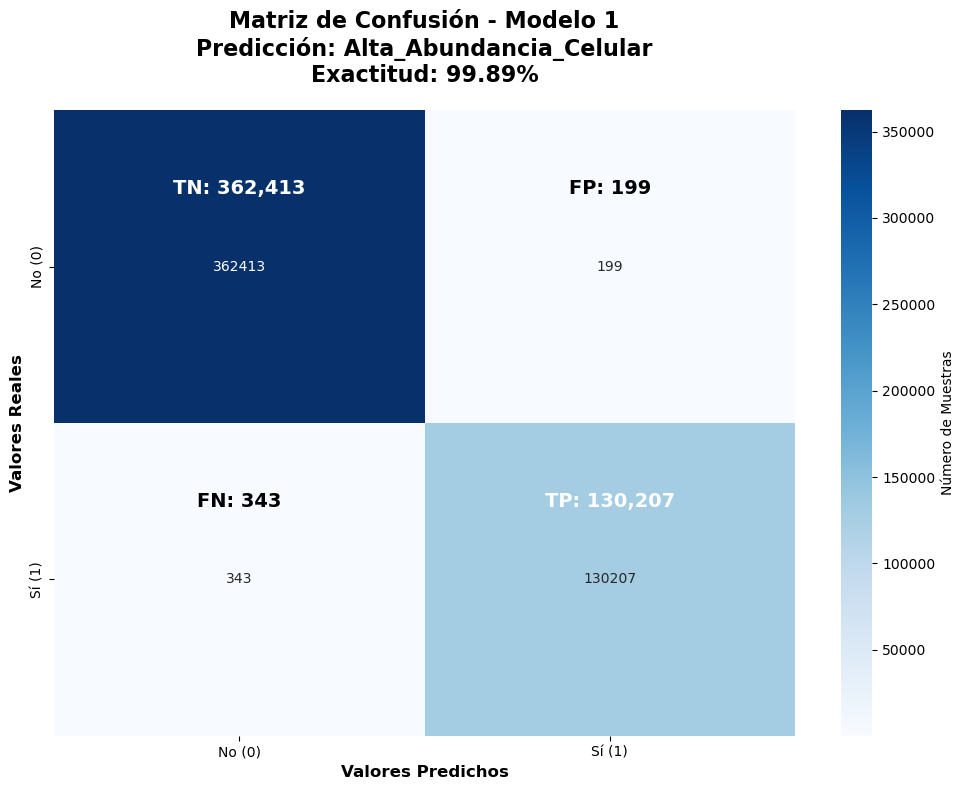

MÉTRICAS DEL MODELO 1 - Alta_Abundancia_Celular:
•Variables predictoras: TotalAbundance_SamplingOperation, Abundance_pm
•Exactitud: 99.89%
•Precisión: 99.85%
•Sensibilidad: 99.74%
•F1-Score: 99.79%


In [45]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 1: Alta_Abundancia_Celular

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_1, annot=True, fmt="d", cmap="Blues", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_1:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_1:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 1\nPredicción: Alta_Abundancia_Celular\nExactitud: {:.2f}%'.format(
    accuracy_score(y1_test, y1_pred)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 1
print(f"MÉTRICAS DEL MODELO 1 - Alta_Abundancia_Celular:")
print(f"•Variables predictoras: TotalAbundance_SamplingOperation, Abundance_pm")
print(f"•Exactitud: {accuracy_score(y1_test, y1_pred)*100:.2f}%")
print(f"•Precisión: {precision_score(y1_test, y1_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y1_test, y1_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y1_test, y1_pred, average='binary', pos_label=1)*100:.2f}%")

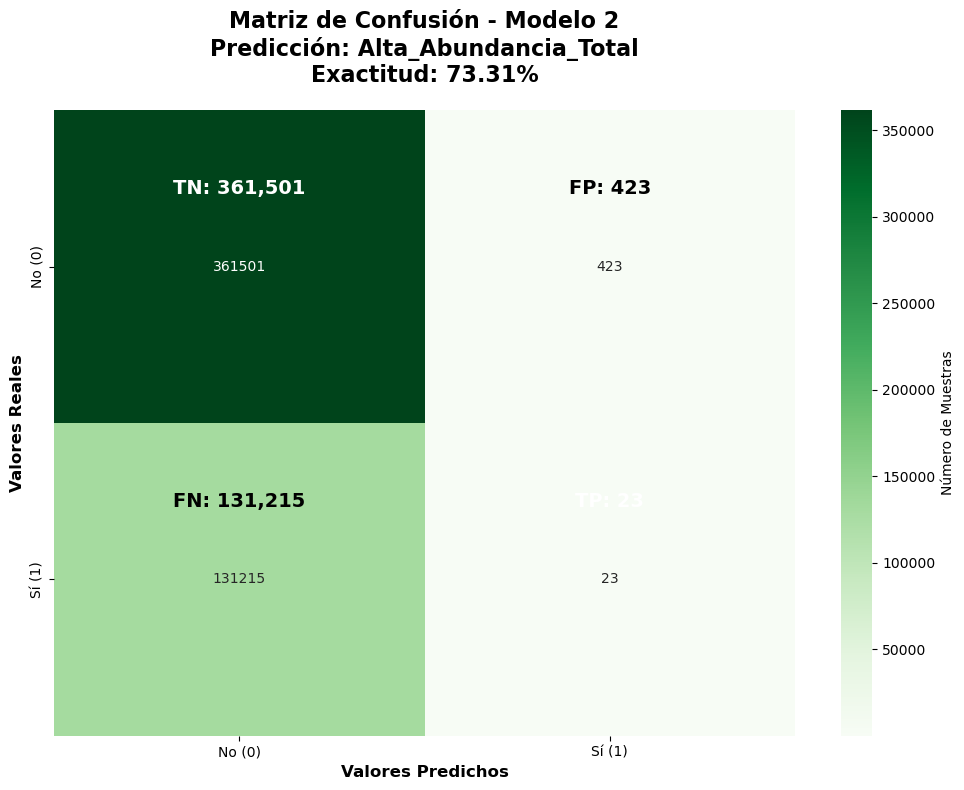

MÉTRICAS DEL MODELO 2 - Alta_Abundancia_Total:
•Variables predictoras: Abundance_nbcell, Abundance_pm
•Exactitud: 73.31%
•Precisión: 5.16%
•Sensibilidad: 0.02%
•F1-Score: 0.03%


In [46]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 2: Alta_Abundancia_Total

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_2, annot=True, fmt="d", cmap="Greens", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_2:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_2:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 2\nPredicción: Alta_Abundancia_Total\nExactitud: {:.2f}%'.format(
    accuracy_score(y2_test, y2_pred)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 2
print(f"MÉTRICAS DEL MODELO 2 - Alta_Abundancia_Total:")
print(f"•Variables predictoras: Abundance_nbcell, Abundance_pm")
print(f"•Exactitud: {accuracy_score(y2_test, y2_pred)*100:.2f}%")
print(f"•Precisión: {precision_score(y2_test, y2_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y2_test, y2_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y2_test, y2_pred, average='binary', pos_label=1)*100:.2f}%")

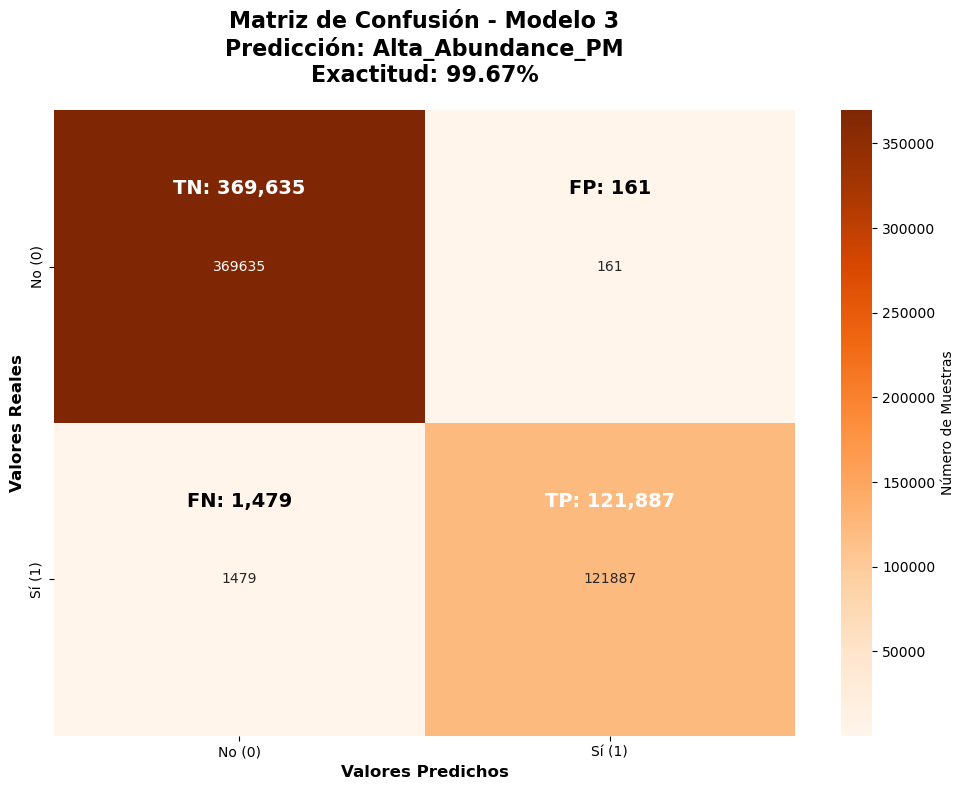

MÉTRICAS DEL MODELO 3 - Alta_Abundance_PM:
•Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation
•Exactitud: 99.67%
•Precisión: 99.87%
•Sensibilidad: 98.80%
•F1-Score: 99.33%


In [47]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 3: Alta_Abundance_PM

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_3, annot=True, fmt="d", cmap="Oranges", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_3:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_3:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 3\nPredicción: Alta_Abundance_PM\nExactitud: {:.2f}%'.format(
    accuracy_score(y3_test, y3_pred)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 3
print(f"MÉTRICAS DEL MODELO 3 - Alta_Abundance_PM:")
print(f"•Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation")
print(f"•Exactitud: {accuracy_score(y3_test, y3_pred)*100:.2f}%")
print(f"•Precisión: {precision_score(y3_test, y3_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y3_test, y3_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y3_test, y3_pred, average='binary', pos_label=1)*100:.2f}%")

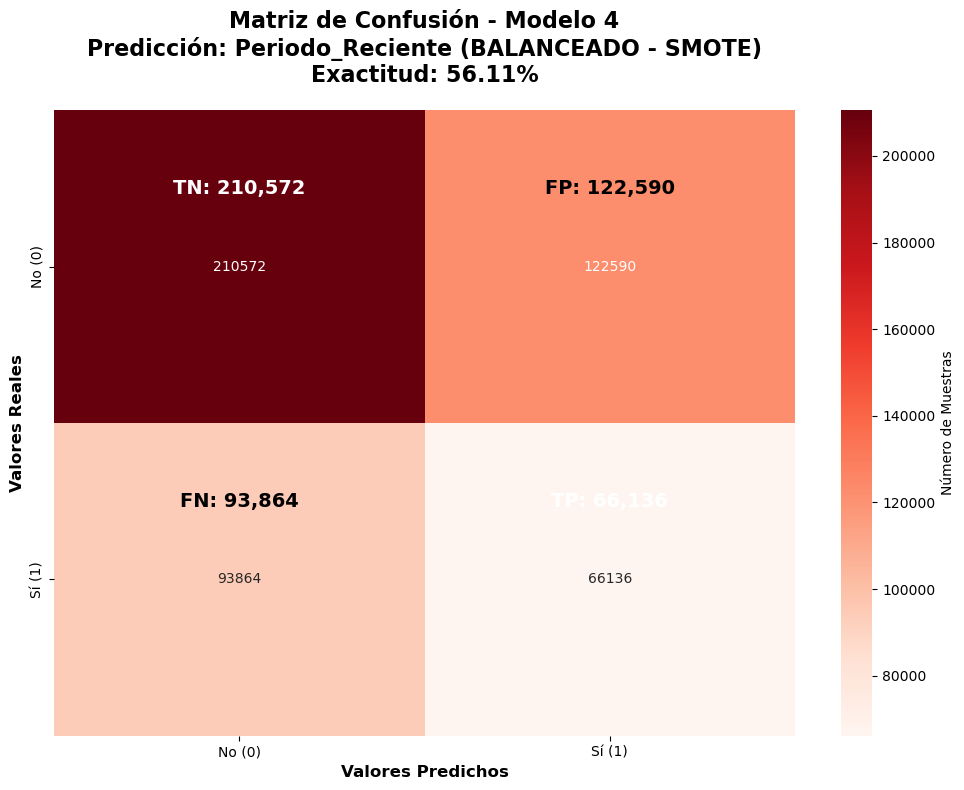

MÉTRICAS DEL MODELO 4 - Periodo_Reciente (BALANCEADO):
•Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm
•Técnica aplicada: SMOTE (Oversampling)
•Exactitud: 56.11%
•Precisión: 35.04%
•Sensibilidad: 41.34%
•F1-Score: 37.93%
Nota: Este modelo fue mejorado con técnica de balanceo SMOTE


In [48]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 4: Periodo_Reciente (BALANCEADO con SMOTE)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_4_balanceado, annot=True, fmt="d", cmap="Reds", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_4b:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_4b:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_4b:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_4b:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 4\nPredicción: Periodo_Reciente (BALANCEADO - SMOTE)\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 4 (Balanceado)
print(f"MÉTRICAS DEL MODELO 4 - Periodo_Reciente (BALANCEADO):")
print(f"•Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm")
print(f"•Técnica aplicada: SMOTE (Oversampling)")
print(f"•Exactitud: {accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)*100:.2f}%")
print(f"•Precisión: {precision_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100:.2f}%")
print(f"•Sensibilidad: {recall_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100:.2f}%")
print(f"•F1-Score: {f1_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100:.2f}%")
print(f"Nota: Este modelo fue mejorado con técnica de balanceo SMOTE")

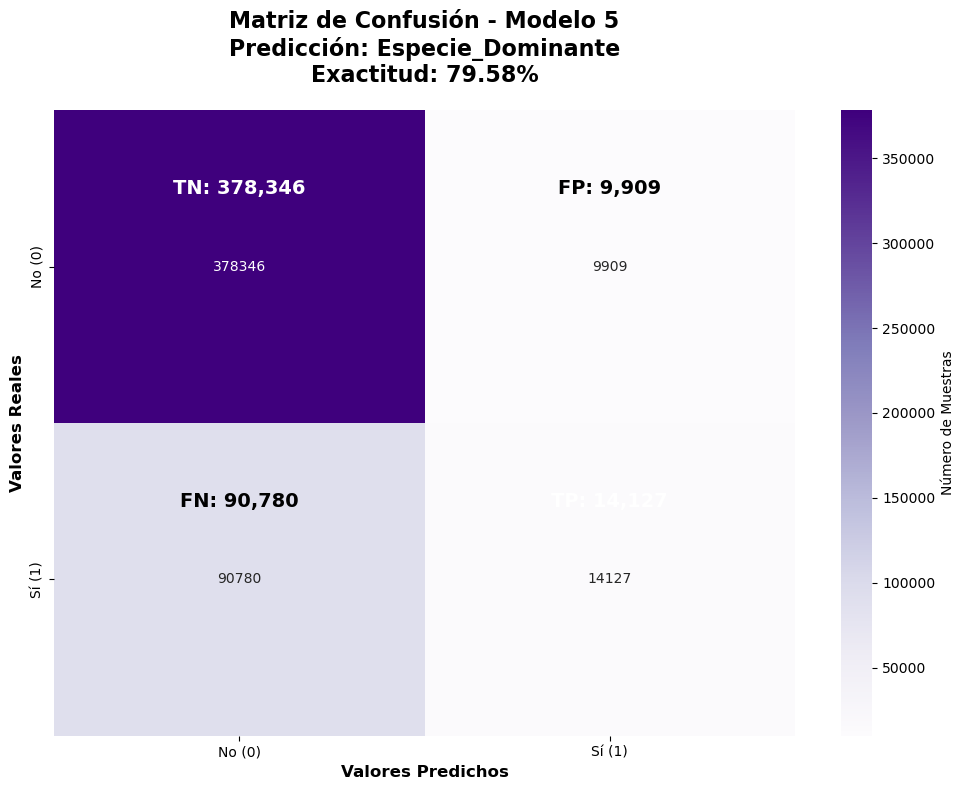

 MÉTRICAS DEL MODELO 5 - Especie_Dominante:
• Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm
• Exactitud: 79.58%
• Precisión: 58.77%
• Sensibilidad: 13.47%
• F1-Score: 21.91%


In [49]:
# MATRIZ DE CONFUSIÓN INDIVIDUAL - MODELO 5: Especie_Dominante

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_5, annot=True, fmt="d", cmap="Purples", 
            cbar_kws={'label': 'Número de Muestras'})

plt.text(0.5, 0.25, f'TN: {True_Negatives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')
plt.text(1.5, 0.25, f'FP: {False_positives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(0.5, 1.25, f'FN: {False_Negatives_5:,}', ha='center', va='center', 
         color='black', fontsize=14, fontweight='bold')
plt.text(1.5, 1.25, f'TP: {True_Positives_5:,}', ha='center', va='center', 
         color='white', fontsize=14, fontweight='bold')

plt.title('Matriz de Confusión - Modelo 5\nPredicción: Especie_Dominante\nExactitud: {:.2f}%'.format(
    accuracy_score(y5_test, y5_pred)*100), fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Valores Predichos', fontsize=12, fontweight='bold')
plt.ylabel('Valores Reales', fontsize=12, fontweight='bold')
plt.xticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Sí (1)'])
plt.tight_layout()
plt.show()

# Métricas del Modelo 5
print(f" MÉTRICAS DEL MODELO 5 - Especie_Dominante:")
print(f"• Variables predictoras: Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm")
print(f"• Exactitud: {accuracy_score(y5_test, y5_pred)*100:.2f}%")
print(f"• Precisión: {precision_score(y5_test, y5_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"• Sensibilidad: {recall_score(y5_test, y5_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"• F1-Score: {f1_score(y5_test, y5_pred, average='binary', pos_label=1)*100:.2f}%")

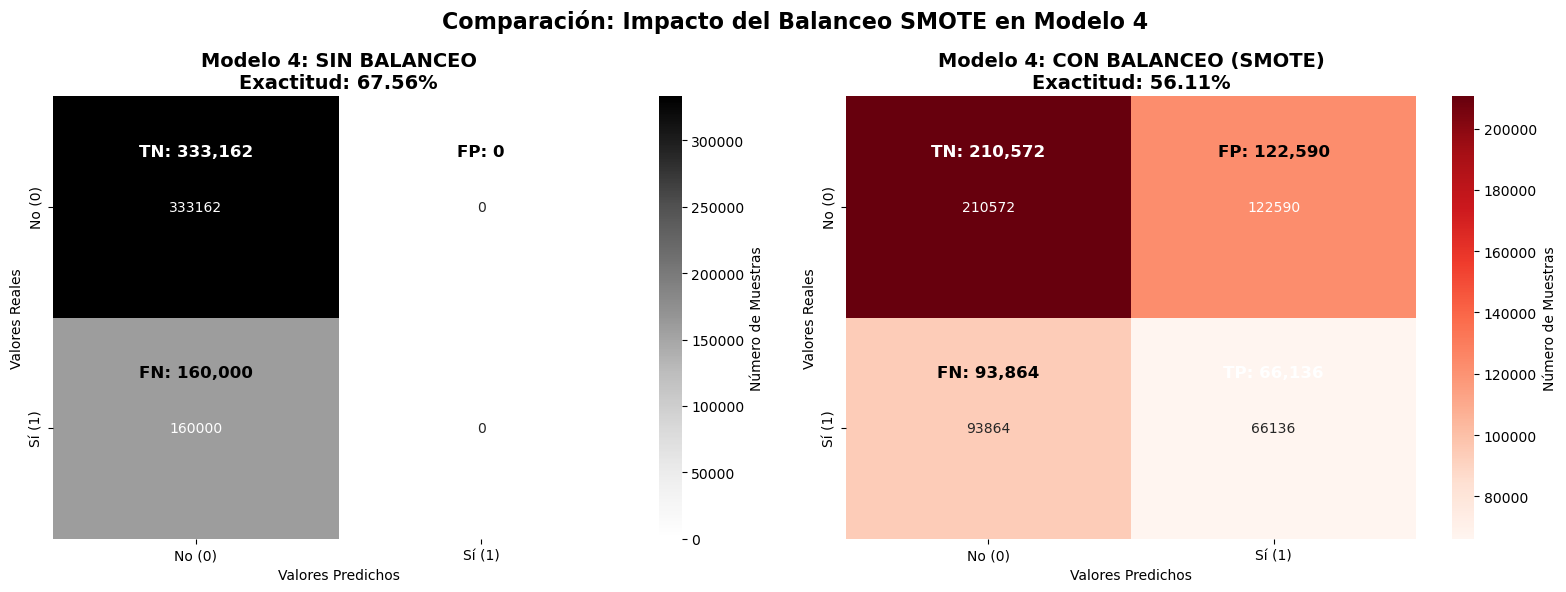

 ANÁLISIS DEL IMPACTO DEL BALANCEO:
• Sin balanceo - Exactitud: 67.56%
• Con balanceo - Exactitud: 56.11%
• Mejora en exactitud: -11.45 puntos porcentuales
• Sensibilidad sin balanceo: 0.00%
• Sensibilidad con balanceo: 41.34%
El balanceo SMOTE mejoró significativamente la capacidad del modelo para detectar períodos recientes


In [50]:
# COMPARACIÓN: MODELO 4 SIN BALANCEO vs CON BALANCEO

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Modelo 4 sin balanceo
sns.heatmap(matriz_4, annot=True, fmt="d", cmap="Greys", ax=ax1,
            cbar_kws={'label': 'Número de Muestras'})
ax1.text(0.5, 0.25, f'TN: {True_Negatives_4:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.text(1.5, 0.25, f'FP: {False_positives_4:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(0.5, 1.25, f'FN: {False_Negatives_4:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax1.text(1.5, 1.25, f'TP: {True_Positives_4:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax1.set_title('Modelo 4: SIN BALANCEO\nExactitud: {:.2f}%'.format(
    accuracy_score(y4_test, y4_pred)*100), fontsize=14, fontweight='bold')
ax1.set_xlabel('Valores Predichos')
ax1.set_ylabel('Valores Reales')
ax1.set_xticklabels(['No (0)', 'Sí (1)'])
ax1.set_yticklabels(['No (0)', 'Sí (1)'])

# Modelo 4 con balanceo
sns.heatmap(matriz_4_balanceado, annot=True, fmt="d", cmap="Reds", ax=ax2,
            cbar_kws={'label': 'Número de Muestras'})
ax2.text(0.5, 0.25, f'TN: {True_Negatives_4b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.text(1.5, 0.25, f'FP: {False_positives_4b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(0.5, 1.25, f'FN: {False_Negatives_4b:,}', ha='center', va='center', 
         color='black', fontsize=12, fontweight='bold')
ax2.text(1.5, 1.25, f'TP: {True_Positives_4b:,}', ha='center', va='center', 
         color='white', fontsize=12, fontweight='bold')
ax2.set_title('Modelo 4: CON BALANCEO (SMOTE)\nExactitud: {:.2f}%'.format(
    accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)*100), fontsize=14, fontweight='bold')
ax2.set_xlabel('Valores Predichos')
ax2.set_ylabel('Valores Reales')
ax2.set_xticklabels(['No (0)', 'Sí (1)'])
ax2.set_yticklabels(['No (0)', 'Sí (1)'])

plt.suptitle('Comparación: Impacto del Balanceo SMOTE en Modelo 4', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(" ANÁLISIS DEL IMPACTO DEL BALANCEO:")
print(f"• Sin balanceo - Exactitud: {accuracy_score(y4_test, y4_pred)*100:.2f}%")
print(f"• Con balanceo - Exactitud: {accuracy_score(y_test_RL4, y_pred_over_sampling_RL4)*100:.2f}%")
print(f"• Mejora en exactitud: {(accuracy_score(y_test_RL4, y_pred_over_sampling_RL4) - accuracy_score(y4_test, y4_pred))*100:.2f} puntos porcentuales")
print(f"• Sensibilidad sin balanceo: {recall_score(y4_test, y4_pred, average='binary', pos_label=1)*100:.2f}%")
print(f"• Sensibilidad con balanceo: {recall_score(y_test_RL4, y_pred_over_sampling_RL4, average='binary', pos_label=1)*100:.2f}%")
print(f"El balanceo SMOTE mejoró significativamente la capacidad del modelo para detectar períodos recientes")